# scikit-learn Pneumonia detection

blahblahblahbl, de quoi nce note book parle

In [1]:
import os
import cv2 #open cv
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [2]:
def load_dataset(dataset_path):
    data = []
    labels = []
    label_id = 0
    for folder in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder)

        if os.path.isdir(folder_path):
            for img_path in os.listdir(folder_path):
                # test if img_path is a valid file
                if not (img_path.endswith(".jpeg") or img_path.endswith(".jpg")) :
                    print("Skipping file: ", img_path)
                    continue
                img = cv2.imread(os.path.join(folder_path, img_path), cv2.IMREAD_GRAYSCALE)
                #print(img, os.path.join(folder_path, img_path))
                if img is None:
                    print("Error: Could not read the image")
                else:
                    img_resized = cv2.resize(img, (32, 32))
                    img_flattened = img_resized.flatten()
                    
                    data.append(img_flattened)
                    labels.append(label_id)
            label_id =1

    return np.array(data), np.array(labels)

dataset_test_path = "../data/chest_Xray/test"
dataset_train_path = "../data/chest_Xray/train"
dataset_train_aug_path = "../data/chest_Xray/train_augmented"


In [3]:
# load data
# pas besoin du train test split puisque les donées sont déjà filter dans les sous dossiers
X_train, y_train = load_dataset(dataset_train_path)
X_train_aug, y_train_aug = load_dataset(dataset_train_aug_path)
X_train = np.concatenate((X_train, X_train_aug))
y_train = np.concatenate((y_train, y_train_aug))
X_test, y_test = load_dataset(dataset_test_path)


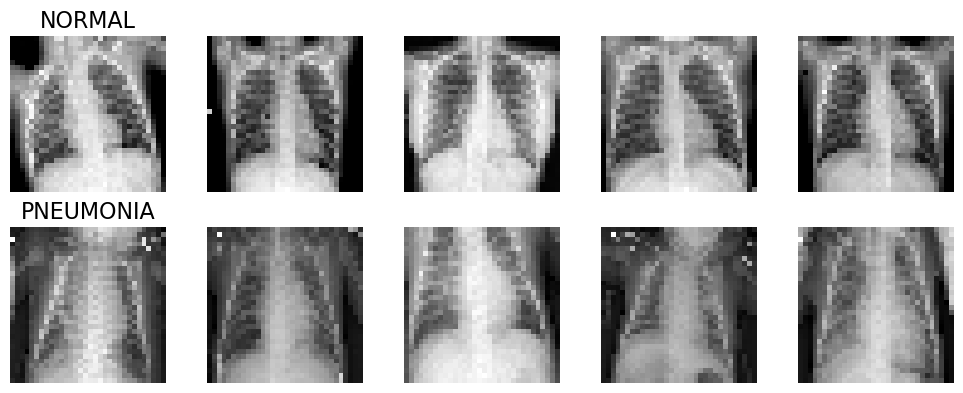

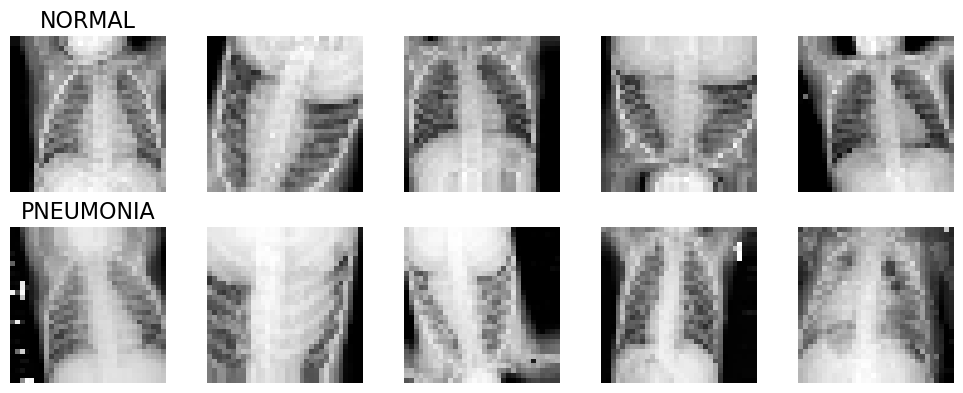

In [4]:
def visualize_data(data, labels, label_names, num_images_per_class=10):
    num_classes = len(set(labels))
    fig, axes = plt.subplots(num_classes, num_images_per_class, figsize=(num_images_per_class * 2, num_classes * 2))
    
    for label_id in range(num_classes):
        label_indices = np.where(labels == label_id)[0]
        sample_indices = np.random.choice(label_indices, size=num_images_per_class, replace=False)

        for i, img_index in enumerate(sample_indices):
            img = data[img_index].reshape(32, 32)
            axes[label_id, i].imshow(img, cmap='gray')
            axes[label_id, i].axis('off')

            if i == 0:
                axes[label_id, i].set_title(label_names[label_id], fontsize=16)

    plt.tight_layout()
    plt.show()

label_names = ["NORMAL", "PNEUMONIA"]
visualize_data(X_train, y_train, label_names, num_images_per_class=5)
visualize_data(X_train_aug, y_train_aug, label_names, num_images_per_class=5)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Linear SVC
Sépare les données en 2 classes ou plus, maximise la marge entre les classes. Plus la marge est important plus le modèle est précis


In [16]:
# build the model
svc = LinearSVC(max_iter=1000, random_state=0)
# train the model
svc.fit(X_train,y_train)

c:\Users\loann\.conda\envs\global\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=0)

## Evaluate the model the model

Evaluation Metrics: These are quantitative measures that help you assess your model's performance on the test data. Some popular metrics for classification tasks include:

- Accuracy: The proportion of correctly classified instances out of the total instances.
- Precision: The proportion of true positive instances among the instances predicted as positive.
- Recall (Sensitivity): The proportion of true positive instances among the actual positive instances.
- F1-score: The harmonic mean of precision and recall, providing a balanced measure of both metrics.
- Confusion Matrix: A table that shows the distribution of predicted and actual class labels, helping you identify where the model is making mistakes.

Visualization: Visualizing the model's predictions can help you better understand its performance. You can create plots and charts to display the results, such as:

- Confusion Matrix:
- Confusion Matrix Heatmap: A visual representation of the confusion matrix that highlights the model's mistakes.
- Classification Report: A table that shows precision, recall, and F1-score for each class.
- ROC Curve and AUC: A plot that shows the true positive rate against the false positive rate for different decision thresholds. The area under the curve (AUC) is a measure of the model's performance.

In [5]:
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score,roc_curve,auc, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns



def crossValidationMetrics(model ,X,y):

    scoring = {
        'accuracy': 'accuracy',
        'precision': make_scorer(precision_score, average='weighted'),
        'recall': make_scorer(recall_score, average='weighted'),
        'f1_score': make_scorer(f1_score, average='weighted')
    }

    # Assuming 'model' is your classifier (e.g., LinearSVC, RandomForestClassifier, etc.)
    # Utiliser la fonction cross_val_score pour évaluer la qualité des prédictions
    cv_scores = cross_validate(model, X, y, cv=5, scoring=scoring)

    print("*********************")
    print("   Qualité de la prédiction   ")
    print("*********************")
    # Afficher les scores de validation croisée
    for metric_name, scores_array in cv_scores.items():
        print(f"{metric_name.capitalize()}: {scores_array.mean():.2f} (+/- {scores_array.std() * 2:.2f})")


def evaluateModel(model, X_test, y_test):

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Compute evaluation metrics on the test data
    accuracy_scores = accuracy_score(y_test, y_pred)
    precision_scores = precision_score(y_test, y_pred, average='weighted')
    recall_scores = recall_score(y_test, y_pred, average='weighted')
    f1_scores = f1_score(y_test, y_pred, average='weighted')
    
    print("*********************")
    print("   Evaluation du modèle   ")
    print("*********************")

    # Print evaluation metrics
    print("Accuracy on test data: %0.2f" % accuracy_scores)
    print("Precision on test data: %0.2f" % precision_scores)
    print("Recall on test data: %0.2f" % recall_scores)
    print("F1-score on test data: %0.2f" % f1_scores)

    # Compute and display the confusion matrix
    conf_mat = confusion_matrix(y_test, y_pred)
    print("Confusion matrix on test data:")
    print(conf_mat)

    # Display the classification report
    class_rep = classification_report(y_test, y_pred)
    print("Classification report on test data:")
    print(class_rep)

    # Display the confusion matrix heatmap
    showConfusionMatrixHeatMap(conf_mat)
    # Display the ROC curve and AUC
    showRocCurveAuc(y_test, y_pred)


def showConfusionMatrixHeatMap(cm):
    # Confusion Matrix Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=label_names, yticklabels=label_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix Heatmap")
    plt.show()

def showRocCurveAuc(y_test, y_pred):

    # ROC Curve and AUC (for binary classification)
    if len(label_names) == 2:
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')

*********************
   Evaluation du modèle   
*********************
Accuracy on test data: 0.75
Precision on test data: 0.80
Recall on test data: 0.75
F1-score on test data: 0.72
Confusion matrix on test data:
[[ 90 152]
 [  6 392]]
Classification report on test data:
              precision    recall  f1-score   support

           0       0.94      0.37      0.53       242
           1       0.72      0.98      0.83       398

    accuracy                           0.75       640
   macro avg       0.83      0.68      0.68       640
weighted avg       0.80      0.75      0.72       640



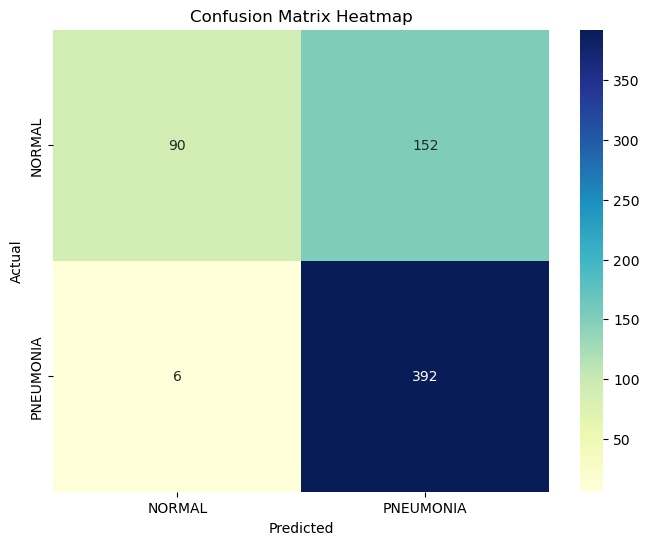

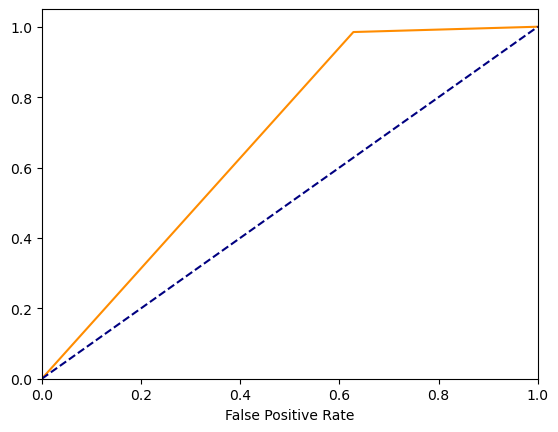

In [17]:
evaluateModel(svc,X_test,y_test)

### Optimize the model

*********************
   Evaluation du modèle   
*********************
Accuracy on test data: 0.75
Precision on test data: 0.80
Recall on test data: 0.75
F1-score on test data: 0.72
Confusion matrix on test data:
[[ 90 152]
 [  6 392]]
Classification report on test data:
              precision    recall  f1-score   support

           0       0.94      0.37      0.53       242
           1       0.72      0.98      0.83       398

    accuracy                           0.75       640
   macro avg       0.83      0.68      0.68       640
weighted avg       0.80      0.75      0.72       640



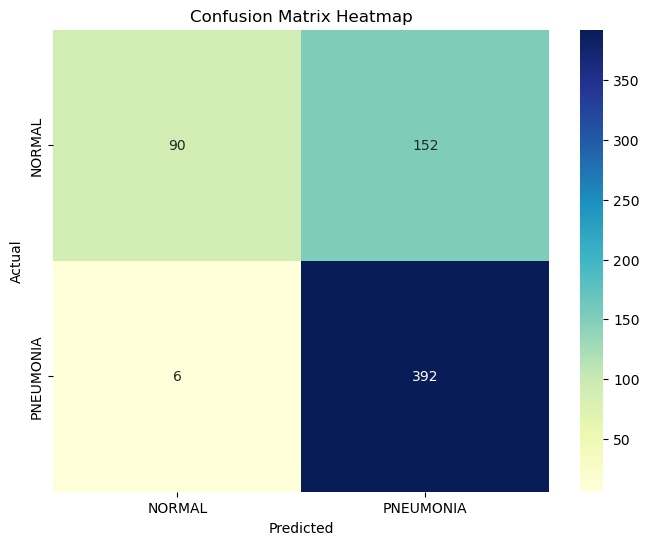

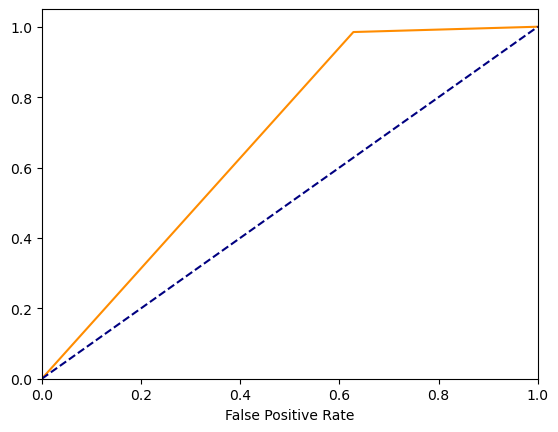

In [20]:
# build the model
svc = LinearSVC(max_iter=20000, random_state=0)
# train the model
svc.fit(X_train,y_train)
# Evaluate
evaluateModel(svc,X_test,y_test)

## Export the model
pickle, utility of pickle...

In [78]:
import pickle
import os



def saveModel(model,model_name,augmented_data=False):
   
    # obtenir le répertoire de travail actuel
    cwd = os.getcwd()

    if augmented_data == True:
        data_path = "augmented"
    else:
        data_path = "original"

    # construire le chemin relatif pour le dossier de stockage des modèles
    model_folder_path = os.path.join(cwd, "sk_models")

    # créer le dossier si nécessaire
    if not os.path.exists(model_folder_path):
        os.mkdir(model_folder_path)

    model_folder_path = os.path.join(model_folder_path, data_path)

    # créer le dossier si nécessaire
    if not os.path.exists(model_folder_path):
        os.mkdir(model_folder_path)

    # construire le chemin complet pour le modèle
    model_path = os.path.join(model_folder_path, model_name + ".pkl")

    # enregistrer le modèle
    with open(model_path, 'wb') as file:
        pickle.dump(model, file)

def loadModel(model_name,augmented_data=False):
     # obtenir le répertoire de travail actuel
    cwd = os.getcwd()

    if augmented_data == True:
        data_path = "augmented"
    else:
        data_path = "original"

    # construire le chemin relatif pour le dossier de stockage des modèles
    model_folder_path = os.path.join(cwd, "sk_models")

    model_folder_path = os.path.join(model_folder_path, data_path)

    # construire le chemin complet pour le modèle
    model_path = os.path.join(model_folder_path, model_name + ".pkl")

    # lire le modèle
    with open(model_path, 'rb') as file:
        model = pickle.load(file)
    return model

In [ ]:
# save the svc model and recuperer
# predire une donnée
# saveModel(neigh,"kneighbors")
# neighLoadModel=loadModel("kneighbors")

*********************
   Evaluation du modèle   
*********************
Accuracy on test data: 0.76
Precision on test data: 0.81
Recall on test data: 0.76
F1-score on test data: 0.73
Confusion matrix on test data:
[[ 93 149]
 [  4 394]]
Classification report on test data:
              precision    recall  f1-score   support

           0       0.96      0.38      0.55       242
           1       0.73      0.99      0.84       398

    accuracy                           0.76       640
   macro avg       0.84      0.69      0.69       640
weighted avg       0.81      0.76      0.73       640



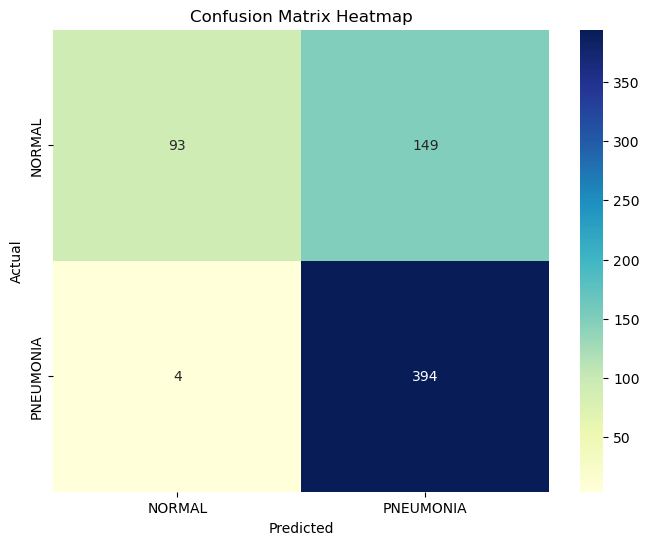

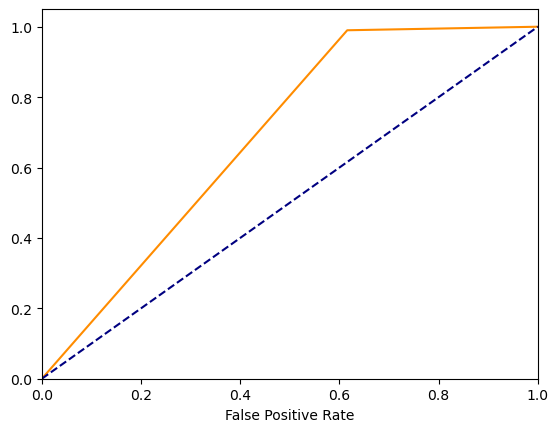

In [33]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=4, weights="uniform")
neigh.fit(X_train, y_train)
evaluateModel(neigh,X_test,y_test)

#### SVC model

*********************
   Evaluation du modèle   
*********************
Accuracy on test data: 0.75
Precision on test data: 0.80
Recall on test data: 0.75
F1-score on test data: 0.71
Confusion matrix on test data:
[[ 84 158]
 [  4 394]]
Classification report on test data:
              precision    recall  f1-score   support

           0       0.95      0.35      0.51       242
           1       0.71      0.99      0.83       398

    accuracy                           0.75       640
   macro avg       0.83      0.67      0.67       640
weighted avg       0.80      0.75      0.71       640



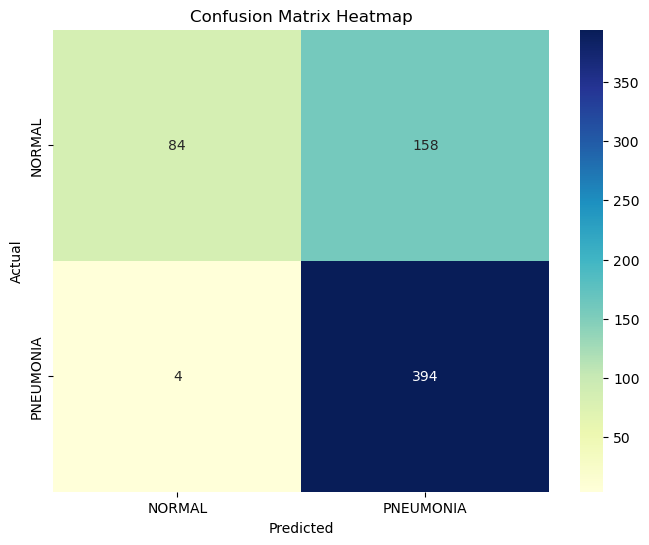

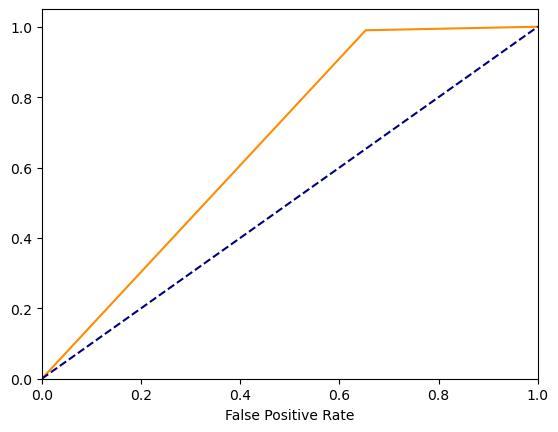

In [36]:
from sklearn.svm import SVC

svc = SVC(kernel="linear", random_state=0)
svc.fit(X_train, y_train)
evaluateModel(svc,X_test,y_test)


#### XGB model

In [81]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(random_state=0, eval_metric='mlogloss')
xgb_classifier.fit(X_train, y_train)
qualityModelPrediction(model=xgb_classifier,X=X_train,y=y_train)


*********************
   Qualité de la prédiction   
*********************
Accuracy: 0.96 (+/- 0.01)
Precision: 0.95 (+/- 0.01)
Recall: 0.90 (+/- 0.03)
F1-score: 0.92 (+/- 0.02)
[[3816   59]
 [ 137 1204]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3875
           1       0.95      0.90      0.92      1341

    accuracy                           0.96      5216
   macro avg       0.96      0.94      0.95      5216
weighted avg       0.96      0.96      0.96      5216



## Optimize the model

Grid search is a method used to perform hyperparameter optimization, that is, it's a way to select the best of a family of hyperparameters, parametrized by a grid of parameters.

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

rf = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Fitting 2 folds for each of 108 candidates, totalling 216 fits
Best Parameters:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score:  0.9422929447852761


*********************
   Evaluation du modèle   
*********************
Accuracy on test data: 0.78
Precision on test data: 0.83
Recall on test data: 0.78
F1-score on test data: 0.75
Confusion matrix on test data:
[[104 138]
 [  3 395]]
Classification report on test data:
              precision    recall  f1-score   support

           0       0.97      0.43      0.60       242
           1       0.74      0.99      0.85       398

    accuracy                           0.78       640
   macro avg       0.86      0.71      0.72       640
weighted avg       0.83      0.78      0.75       640



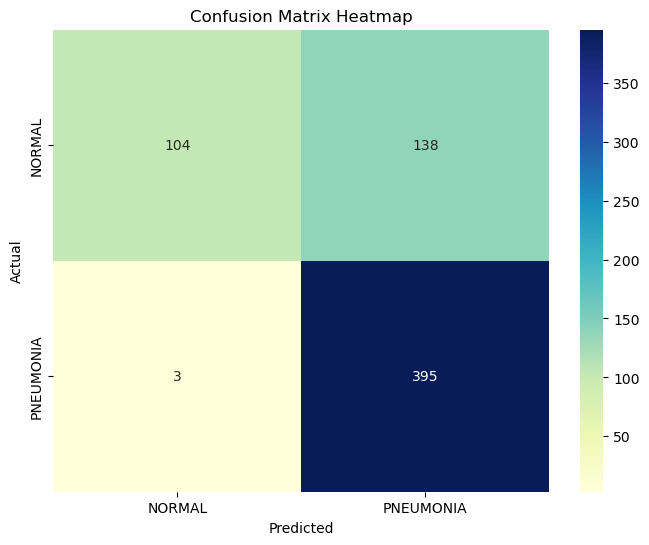

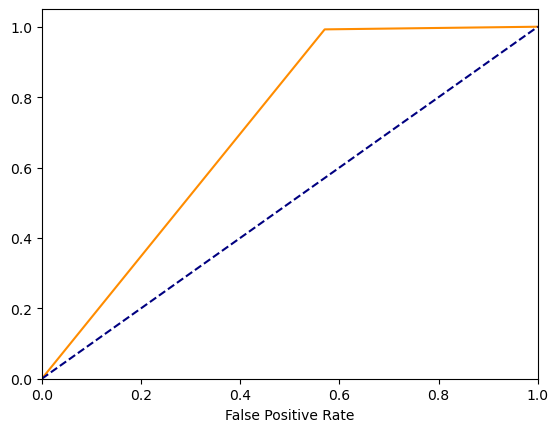

In [51]:
evaluateModel(grid_search.best_estimator_, X_test, y_test)

# best_rf = RandomForestClassifier(random_state=0, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=500)
# best_rf.fit(X_train, y_train)
# evaluateModel(best_rf, X_test, y_test)

## Catboost

The newest of the popular gradient boosting libraries, CatBoost (Categorical Boosting) was developed by the Russian tech company Yandex in mid-2017, following closely on the heels of LightGBM. Unfortunately, I have yet to see CatBoost consistently outperform its competitors (though with many categorical features it does tend to come out on top), nor match the speed of LightGBM, but that could definitely change with future updates. However, CatBoost was meant for cases such as categorical and text data, so please take the results of this article with a grain of salt when deciding which methods to try for your use-case.

*********************
   Evaluation du modèle   
*********************
Accuracy on test data: 0.73
Precision on test data: 0.79
Recall on test data: 0.73
F1-score on test data: 0.68
Confusion matrix on test data:
[[ 72 170]
 [  4 394]]
Classification report on test data:
              precision    recall  f1-score   support

           0       0.95      0.30      0.45       242
           1       0.70      0.99      0.82       398

    accuracy                           0.73       640
   macro avg       0.82      0.64      0.64       640
weighted avg       0.79      0.73      0.68       640



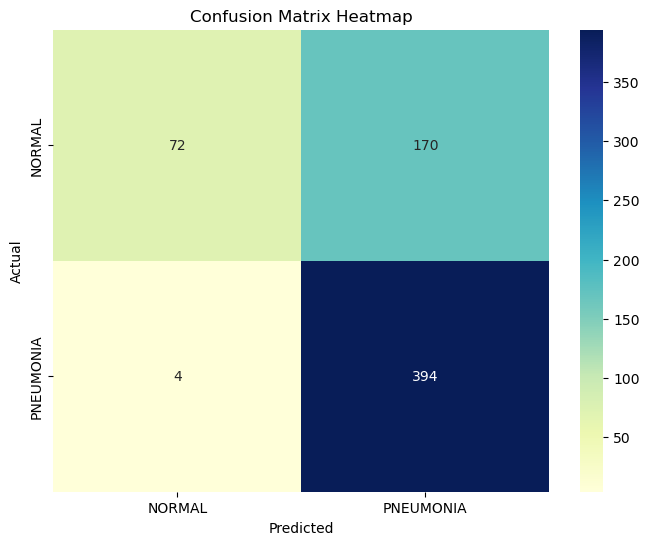

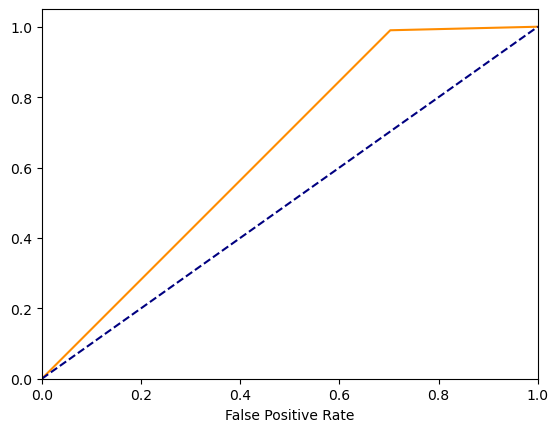

In [54]:
from catboost import CatBoostClassifier

cat_boost_cl = CatBoostClassifier(
    n_estimators=2000,
    max_leaves=31,
    subsample=0.67,
    verbose=0,
    thread_count=6,
    random_seed=0
)
cat_boost_cl.fit(X_train, y_train)
evaluateModel(cat_boost_cl, X_test, y_test)

##lightgbm

by microsoft 2017

In [58]:
import lightgbm as lgb

m_lgb = lgb.LGBMClassifier(
    n_estimators=2000,
    # feature_fraction=0.06,
    # bagging_fraction=0.67,
    # bagging_freq=1,
    verbose=0,
    n_jobs=6,
    random_state=0
)
m_lgb.fit(X_train, y_train)
#evaluateModel(m_lgb, X_test, y_test)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022341 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

LGBMClassifier(n_estimators=2000, n_jobs=6, random_state=0, verbose=0)

In [ ]:
#https://towardsdatascience.com/boosting-showdown-scikit-learn-vs-xgboost-vs-lightgbm-vs-catboost-in-sentiment-classification-f7c7f46fd956

*********************
   Evaluation du modèle   
*********************
Accuracy on test data: 0.75
Precision on test data: 0.80
Recall on test data: 0.75
F1-score on test data: 0.71
Confusion matrix on test data:
[[ 83 159]
 [  4 394]]
Classification report on test data:
              precision    recall  f1-score   support

           0       0.95      0.34      0.50       242
           1       0.71      0.99      0.83       398

    accuracy                           0.75       640
   macro avg       0.83      0.67      0.67       640
weighted avg       0.80      0.75      0.71       640



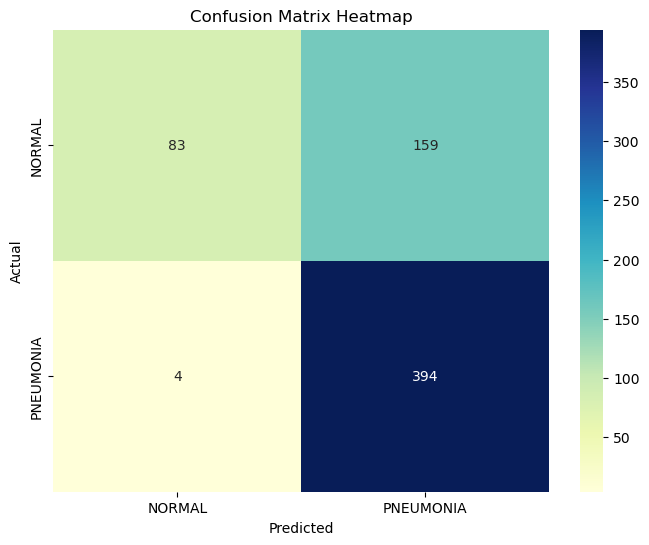

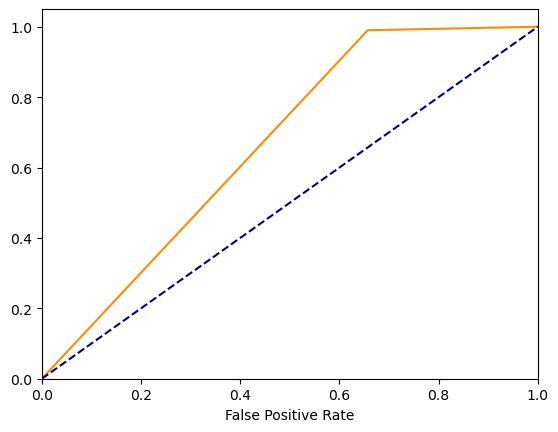

In [59]:
evaluateModel(m_lgb, X_test, y_test)

## Conclusion

Scikit-learn is a very powerful library that provides a wide range of machine learning algorithms for both supervised and unsupervised learning, including tools for model selection and evaluation, data transformation, and data loading. It's an excellent choice for many machine learning tasks with structured data.

However, when it comes to image classification, deep learning models, specifically Convolutional Neural Networks (CNNs), have shown superior performance in most cases. This is because CNNs are designed to automatically and adaptively learn spatial hierarchies of features, which is ideal for image data. Libraries like TensorFlow and PyTorch, along with their high-level APIs like Keras, provide the necessary tools to design and train these kinds of models.

That said, scikit-learn can still be used for image classification tasks, particularly for smaller datasets or as a baseline model. Techniques like PCA for dimensionality reduction, SVMs for classification, and grid search for hyperparameter tuning can all be used effectively with image data in scikit-learn. However, for large-scale image classification tasks, deep learning models are generally a better choice.

In conclusion, while scikit-learn is an excellent library for many machine learning tasks, for image classification, you might achieve better results with a deep learning library like TensorFlow or PyTorch.